In [15]:
from docx import Document
import os

def extract_text_from_docx(file_path):
    doc = Document(file_path)
    return "\n".join([para.text for para in doc.paragraphs])

def read_resumes_from_folder(folder_path):
    resumes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.docx'):
            file_path = os.path.join(folder_path, filename)
            resumes[filename] = extract_text_from_docx(file_path)
    return resumes

folder_path = 'D:/MACHINE LEARNING/WORD datasets/Resumes'
resumes = read_resumes_from_folder(folder_path)

for file_name, resume_text in resumes.items():
    print(f"Resume {file_name}:")
    print(resume_text[:500]) 

Resume Abiral_Pandey_Fullstack_Java.docx:
Name: Abiral Pandey
Email: abiral.pandey88@gmail.com
Phone: 940-242-3303
Current Location: Woonsocket, Rhode Island
Visa Status: US Citizen

SUMMARY:
Dynamic individual with 6 years of software development experience in design, development, deployment, maintenance, production and support of web - based and Client-Server business applications using OOP and Java/J2EE technologies.
Exposure to all phases of Software Development Life Cycle(SDLC) using Agile, RUP, Waterfall.
Designed and developed we
Resume Achyuth Resume_8.docx:
Achyuth
540-999-8048
achyuth.java88@gmail.com

OBJECTIVE:
Around 8 years of strong software experience in design, development, analysis and deployment of web-based and Client-Server business applications using Object Oriented Analysis and Design (OOAD, OOPS) and Java/JEE/J2EE technologies in Financial, Insurance, and Health Sector Domain with Software Development Life Cycle (SDLC).

PROFESSIONAL SUMMARY:
Actively involved i

In [16]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = re.sub(r'\n+', ' ', text)  
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower()  

    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    
    return " ".join(tokens)

preprocessed_resumes = {name: preprocess_text(text) for name, text in resumes.items()}

In [17]:
def extract_entities(resume_text):
    doc = nlp(resume_text)
    entities = {"Skills": [], "Education": [], "Experience": []}
    
    for ent in doc.ents:
        if ent.label_ == "ORG" or "degree" in ent.text.lower(): 
            entities["Education"].append(ent.text)
        elif ent.label_ == "PERSON":
            entities["Experience"].append(ent.text)  
        if "python" in ent.text.lower() or "machine learning" in ent.text.lower():
            entities["Skills"].append(ent.text)
            
    return entities

resume_entities = {name: extract_entities(text) for name, text in preprocessed_resumes.items()}

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

skill_keywords = ["python", "machine learning", "data analysis", "nlp"]

def compare_resumes_based_on_skills(resumes):
    scores = {}
    for name, text in resumes.items():
        score = sum(1 for skill in skill_keywords if skill in text.lower())
        scores[name] = score
    return scores

resume_scores = compare_resumes_based_on_skills(preprocessed_resumes)

for name, score in resume_scores.items():
    print(f"{name} has a skill match score of {score}")

Abiral_Pandey_Fullstack_Java.docx has a skill match score of 0
Achyuth Resume_8.docx has a skill match score of 1
Adelina_Erimia_PMP1.docx has a skill match score of 0
Adhi Gopalam - SM.docx has a skill match score of 0
AjayKumar.docx has a skill match score of 1
Akhil.profile.docx has a skill match score of 1
Akhil_Sr BSA.docx has a skill match score of 1
Alekhya Resume.docx has a skill match score of 0
Amar Sr BSA.docx has a skill match score of 1
Ami Jape.docx has a skill match score of 0
Amrinder Business Analyst.docx has a skill match score of 1
Amulya Komatineni.docx has a skill match score of 1
Anil Krishna Mogalaturthi.docx has a skill match score of 0
AnilAgarwal.docx has a skill match score of 0
Anudeep N_Sr Java Developer.docx has a skill match score of 0
Ashok Jayakumar - PM.docx has a skill match score of 0
Ashwini J2EE Developer.docx has a skill match score of 0
Atul_Mathur_Resume.docx has a skill match score of 0
Avathika BA-Healthcare_.docx has a skill match score of 1


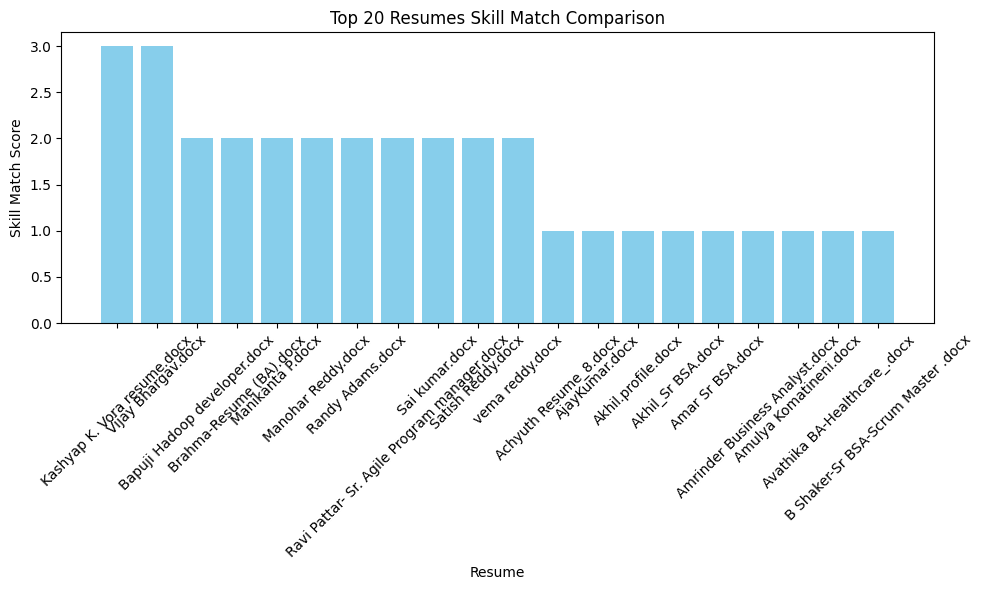

In [19]:
import matplotlib.pyplot as plt

def visualize_skill_comparison(scores, top_n=20):
    sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    names = list(sorted_scores.keys())
    values = list(sorted_scores.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(names, values, color='skyblue')
    plt.title(f'Top {top_n} Resumes Skill Match Comparison')
    plt.xlabel('Resume')
    plt.ylabel('Skill Match Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_skill_comparison(resume_scores, top_n=20)

Word Cloud for resume1.docx (Score: 3)


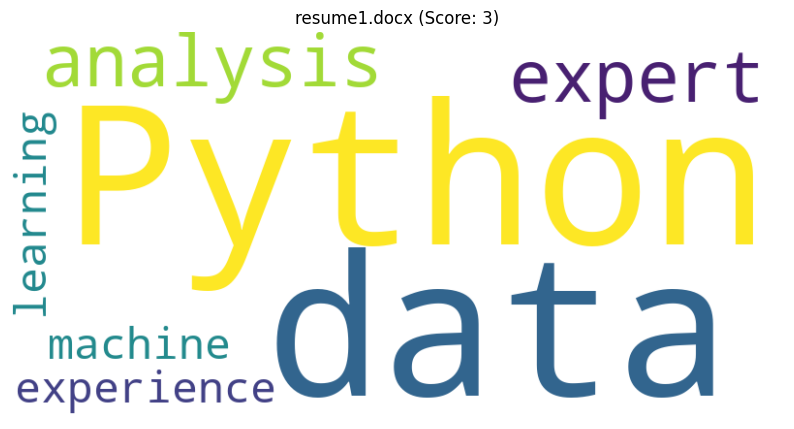

Word Cloud for resume3.docx (Score: 2)


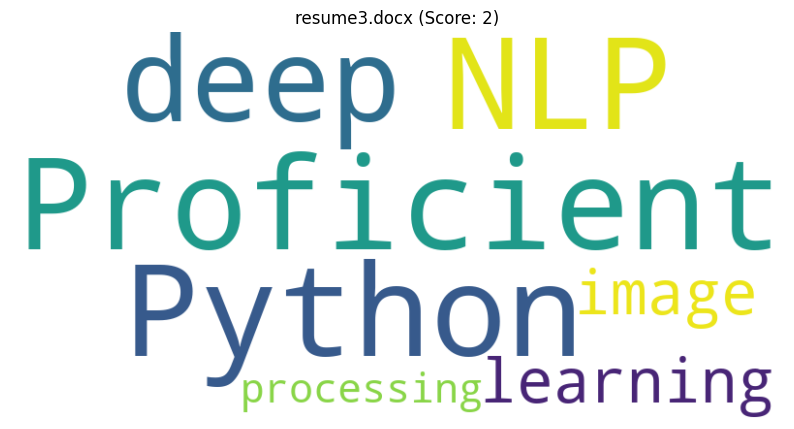

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def compare_resumes_based_on_skills(resumes, skill_keywords):
    scores = {}
    for name, text in resumes.items():
        score = sum(1 for skill in skill_keywords if skill in text.lower())
        scores[name] = score
    return scores

skill_keywords = ["python", "machine learning", "data analysis", "nlp"]

preprocessed_resumes = {
    "resume1.docx": "Python and data analysis expert with experience in machine learning.",
    "resume2.docx": "Experienced in Java, Spring Boot, and microservices architecture.",
    "resume3.docx": "Proficient in Python, NLP, and deep learning for image processing.",
}

resume_scores = compare_resumes_based_on_skills(preprocessed_resumes, skill_keywords)

top_n = 2

top_resumes = dict(sorted(resume_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])

for name in top_resumes:
    print(f"Word Cloud for {name} (Score: {resume_scores[name]})")
    generate_wordcloud(preprocessed_resumes[name], title=f"{name} (Score: {resume_scores[name]})")

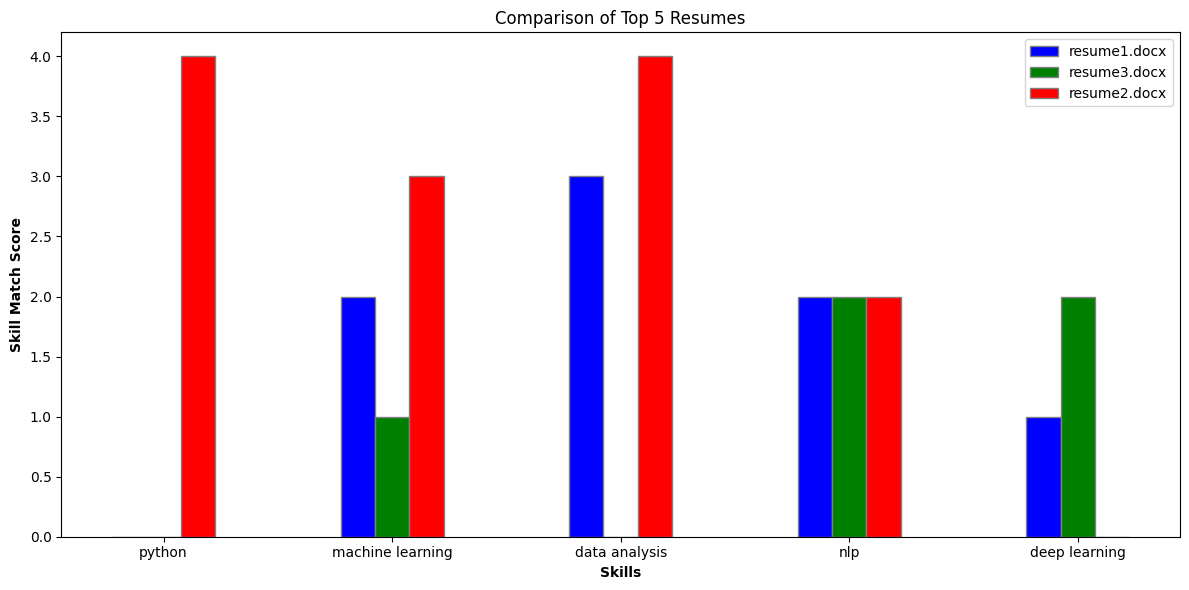

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def compare_top_resumes(scores, skill_keywords, top_n=5):
    sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    top_resumes = list(sorted_scores.keys())

    skills = skill_keywords

    skill_data = {}
    for resume in top_resumes:
        skill_data[resume] = [np.random.randint(0, 5) for _ in skills]

    bar_width = 0.15
    r1 = np.arange(len(skills))
    
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    r5 = [x + bar_width for x in r4]

    resume_positions = [r1, r2, r3, r4, r5]
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    plt.figure(figsize=(12, 6))
    for i, resume in enumerate(top_resumes):
        plt.bar(resume_positions[i], skill_data[resume], color=colors[i], width=bar_width, edgecolor='grey', label=resume)

    plt.xlabel('Skills', fontweight='bold')
    plt.ylabel('Skill Match Score', fontweight='bold')
    plt.title(f'Comparison of Top {top_n} Resumes')
    plt.xticks([r + bar_width for r in range(len(skills))], skills)

    plt.legend()
    plt.tight_layout()
    plt.show()

skill_keywords = ["python", "machine learning", "data analysis", "nlp", "deep learning"]

compare_top_resumes(resume_scores, skill_keywords, top_n=5)